In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e1/sample_submission.csv
/kaggle/input/playground-series-s3e1/train.csv
/kaggle/input/playground-series-s3e1/test.csv


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv('/kaggle/input/playground-series-s3e1/train.csv', index_col='id')
test = pd.read_csv('/kaggle/input/playground-series-s3e1/test.csv', index_col='id')

In [5]:
train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,,,,,,,,,
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [6]:
train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [7]:
train.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [8]:
test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
id,,,,,,,,
37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29


In [35]:
train.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [9]:
import seaborn as sns

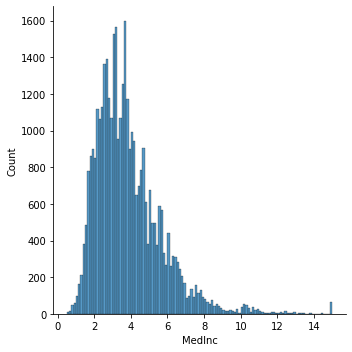

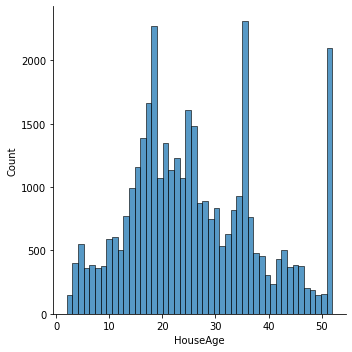

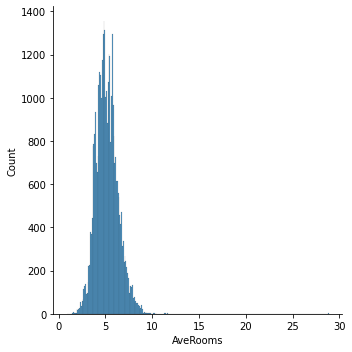

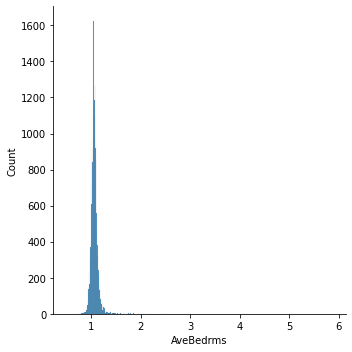

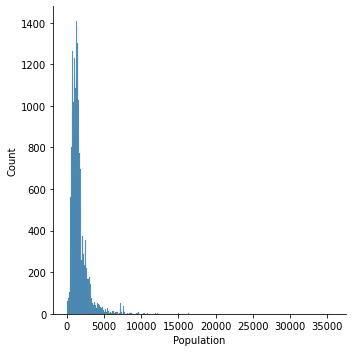

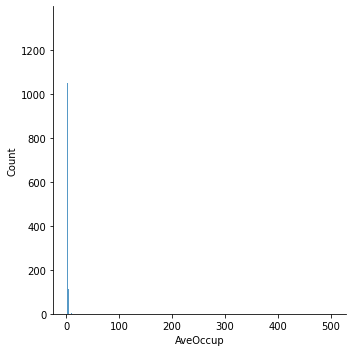

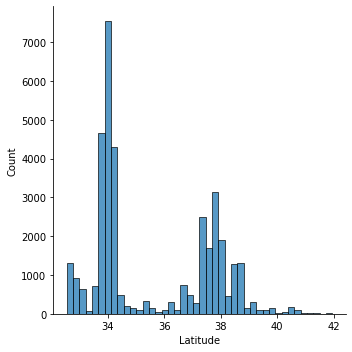

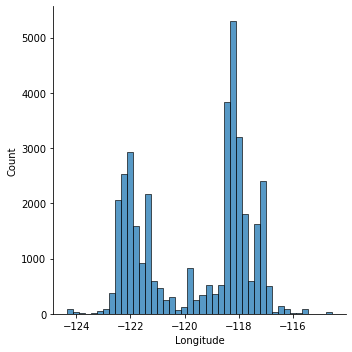

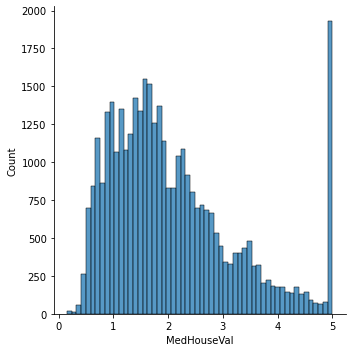

In [10]:
for item in train.columns:
    
    sns.displot(train[item])

In [11]:
train['MedHouseVal'] = np.log1p(train.MedHouseVal.values)

In [12]:
train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,,,,,,,,,
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.683097
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.665776
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,0.946238
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,0.848440
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,1.704748
...,...,...,...,...,...,...,...,...,...
37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.049422
37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,0.950885
37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,1.478646


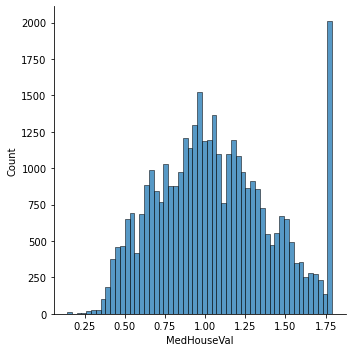

In [13]:
sns.displot(train.MedHouseVal)

In [14]:
from sklearn.utils import shuffle

In [15]:
X_1 = train.iloc[:,train.columns != 'MedHouseVal']
y_1 = train.MedHouseVal

In [16]:
X, y = shuffle(X_1, y_1, random_state=13)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
id,,,,,,,,
15742,3.3194,52.0,4.869806,1.026930,1437.0,1.898204,37.77,-122.27
23852,2.7667,37.0,4.945455,1.054545,691.0,1.748545,38.54,-121.46
5989,3.1607,25.0,3.703825,1.130165,1430.0,1.940120,34.16,-118.38
26946,3.5200,26.0,5.462916,1.071702,2531.0,4.236052,34.18,-117.99
31231,6.2561,29.0,6.420195,1.052478,1743.0,2.653295,37.82,-122.02
...,...,...,...,...,...,...,...,...
153,2.0469,18.0,4.743363,1.097315,2307.0,2.890973,33.84,-116.96
22260,6.3586,33.0,5.839506,1.067901,669.0,2.892231,34.25,-118.46
33634,4.3039,29.0,5.127346,1.049065,3132.0,2.696662,32.77,-117.08


In [17]:
offset = int(X.shape[0] * 0.6)

In [18]:
X_train, y_train = X[:offset], y[:offset]
X_val, y_val = X[offset:], y[offset:]

In [19]:
from sklearn.ensemble import AdaBoostRegressor

In [20]:
regr = AdaBoostRegressor(random_state=13, n_estimators=100)
regr.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=13)

In [21]:
preds = regr.predict(X_val)

In [23]:
regr.score(X_val, preds)

1.0

In [24]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [26]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [27]:
pred_val = regr.predict(X_val)

In [28]:
regr.score(X_val, pred_val)

1.0

In [29]:
log_score = regr.predict(test)

In [30]:
MedHouseVal = np.expm1(log_score)

In [31]:
MedHouseVal

array([0.6634717 , 1.16020944, 3.86864229, ..., 1.16288326, 3.86628753,
       3.32976155])

In [34]:
submission = pd.DataFrame({'id':test.index.values, 'MedHouseVal': MedHouseVal})
submission.to_csv('/kaggle/working/submission1.csv', index = False)

In [36]:
from xgboost import XGBRegressor

In [37]:
model = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42)

model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_val, y_val)], 
    verbose=True, 
    early_stopping_rounds = 20)

[0]	validation_0-rmse:0.60481	validation_1-rmse:0.60329
[1]	validation_0-rmse:0.55110	validation_1-rmse:0.55070
[2]	validation_0-rmse:0.50188	validation_1-rmse:0.50230
[3]	validation_0-rmse:0.45882	validation_1-rmse:0.46019
[4]	validation_0-rmse:0.42010	validation_1-rmse:0.42261
[5]	validation_0-rmse:0.38613	validation_1-rmse:0.38975
[6]	validation_0-rmse:0.35454	validation_1-rmse:0.35945
[7]	validation_0-rmse:0.32633	validation_1-rmse:0.33265
[8]	validation_0-rmse:0.30163	validation_1-rmse:0.30962
[9]	validation_0-rmse:0.27990	validation_1-rmse:0.28963
[10]	validation_0-rmse:0.26058	validation_1-rmse:0.27196
[11]	validation_0-rmse:0.24343	validation_1-rmse:0.25683
[12]	validation_0-rmse:0.22815	validation_1-rmse:0.24372
[13]	validation_0-rmse:0.21454	validation_1-rmse:0.23211
[14]	validation_0-rmse:0.20261	validation_1-rmse:0.22213
[15]	validation_0-rmse:0.19218	validation_1-rmse:0.21395
[16]	validation_0-rmse:0.18302	validation_1-rmse:0.20691
[17]	validation_0-rmse:0.17512	validation

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=0.5,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, ...)

In [42]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

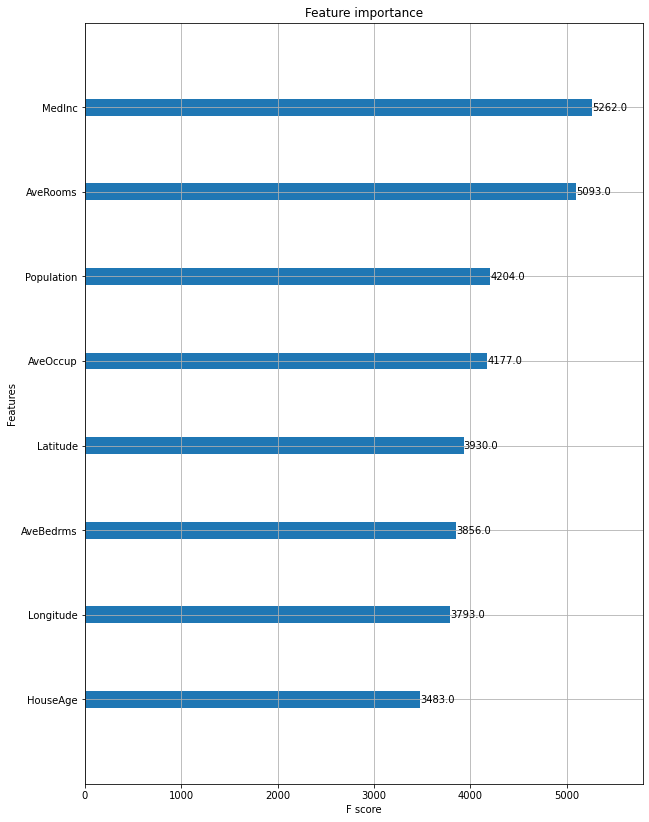

In [43]:
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)
plot_features(model, (10,14))

In [46]:
log_score1 = model.predict(test)

In [45]:
MedHouseVal = np.expm1(log_score1)

In [47]:
submission = pd.DataFrame({'id':test.index.values, 'MedHouseVal': MedHouseVal})
submission.to_csv('/kaggle/working/submission2.csv', index = False)

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
prediction = rf.predict(X_val)
mse = mean_squared_error(y_val, prediction)
rmse = mse**.5
print(mse)
print(rmse)

0.04678852589301218
0.21630655536301294


In [57]:
from datetime import datetime

In [59]:
from sklearn.model_selection import GridSearchCV

In [62]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}
## show start time
print(datetime.now())
## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)
## show end time
print(datetime.now())

2023-01-03 07:21:52.948826
2023-01-03 07:41:29.331735


In [64]:
print(CV_rfr.best_params_)

{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 300, 'random_state': 18}


In [65]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'log2', max_depth = 7, random_state = 18)
rf.fit(X_1, y_1)# Predict on test data
prediction_log = rf.predict(test)

In [69]:
MedHouseVal = np.expm1(prediction_log)

In [70]:
submission = pd.DataFrame({'id':test.index.values, 'MedHouseVal': prediction_log})
submission.to_csv('/kaggle/working/submission3.csv', index = False)

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [72]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_val_std = sc.transform(X_val)
test_std = sc.transform(test) 

In [74]:
gbr_params = {'n_estimators': 1000,
              'max_depth': 3,
              'min_samples_split': 5,
              'learning_rate': 0.01,
              'loss': 'ls'
             }

In [75]:
gbr = GradientBoostingRegressor(**gbr_params)

In [76]:
gbr.fit(X_train_std, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='ls', min_samples_split=5,
                          n_estimators=1000)

In [77]:
print("Model Accuracy: %.3f" % gbr.score(X_val_std, y_val))

Model Accuracy: 0.751


In [78]:
mse = mean_squared_error(y_val, gbr.predict(X_val_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0315


In [79]:
log_score2 = gbr.predict(test_std)

In [81]:
MedHouseVal = np.expm1(log_score2)

In [82]:
submission = pd.DataFrame({'id':test.index.values, 'MedHouseVal': MedHouseVal})
submission.to_csv('/kaggle/working/submission4.csv', index = False)

In [83]:
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor

In [84]:
model = KNeighborsRegressor(n_neighbors=8)
print(model)

KNeighborsRegressor(n_neighbors=8)


In [85]:
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [86]:
pred_y = model.predict(X_val)

In [87]:
mse = mean_squared_error(y_val, pred_y)
print("Mean Squared Error:",mse)

Mean Squared Error: 0.10179730680519632


In [88]:
log_score3 = model.predict(test)

In [93]:
MedHouseVal = log_score3

In [94]:
submission = pd.DataFrame({'id':test.index.values, 'MedHouseVal': MedHouseVal})
submission.to_csv('/kaggle/working/submission5.csv', index = False)